In [3]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [10]:
## Data Cleaning
movies = pd.read_csv("/Users/talmageanderson/Desktop/Stat_486/mini1 data/movies.csv")

# Calculate the number of stars based on the number of '(' characters
movies['num_stars'] = movies['stars'].apply(lambda x: x.count('('))

# Convert all values in 'runtime' to strings, then remove ' min'
movies['runtime'] = movies['runtime'].astype(str).str.replace(' min', '', regex=False)

# Convert the cleaned 'runtime' column to numeric
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

# Fill missing values (if any) with the median or other appropriate value
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].median())

# Ensure 'votes' column is treated as strings, then remove commas
movies['votes'] = movies['votes'].astype(str).str.replace(',', '', regex=True)

# Convert the cleaned 'votes' column back to numeric
movies['votes'] = pd.to_numeric(movies['votes'], errors='coerce')

# Fill missing values (if any) with 0 or an appropriate default
movies['votes'] = movies['votes'].fillna(0)

# Remove '$' and 'M', then convert to numeric and multiply by 1,000,000
movies['gross_earn'] = (
    movies['gross_earn']
    .str.replace('$', '', regex=False)  # Remove dollar sign
    .str.replace('M', '', regex=False)  # Remove 'M'
    .astype(float)                      # Convert to float
    * 1_000_000                         # Multiply by 1,000,000
)

# Handle missing values (if any)
movies['gross_earn'] = movies['gross_earn'].fillna(0)

# Ensure all values in 'genre' are strings; replace NaN with an empty string
movies['genre'] = movies['genre'].fillna('').astype(str)

# 1. Split genres and create a list of all unique genres
movies['genre_list'] = movies['genre'].apply(lambda x: [g.strip() for g in x.split(',') if g])

# 2. Create a set of all unique genres
unique_genres = set(g for genres in movies['genre_list'] for g in genres)

# 3. One-hot encode genres
for genre in unique_genres:
    movies[f'genre_{genre}'] = movies['genre_list'].apply(lambda x: 1 if genre in x else 0)

# 4. Drop the extra columns
movies = movies.drop(columns=['genre_list'])

movies.head(5)

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,...,genre_History,genre_Thriller,genre_Musical,genre_Sci-Fi,genre_Family,genre_Film-Noir,genre_Biography,genre_Music,genre_Fantasy,genre_Animation
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...",2626905,...,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...",2598173,...,0,0,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,Inception,12A,148.0,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt...",2304062,...,0,0,0,1,0,0,0,0,0,0
3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fight Club,18,139.0,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa...",2071088,...,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pulp Fiction,18,154.0,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel...",2011013,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Select relevant data
X = movies[['runtime']]  # Feature
y = movies[['gross_earn']]  # Target (needs reshaping for scaling)

# Scaling runtime and gross_earn
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [11]:
# Select relevant data
X = movies[['runtime']]  # Feature
movies['gross_earn_log'] = np.log1p(movies['gross_earn'])  # Add 1 to avoid log(0)
y = movies[['gross_earn_log']]

# Scaling runtime and gross_earn
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 25.928650225119114
R^2 Score: 0.005776203034788541


/Users/talmageanderson/anaconda3/envs/dnn/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


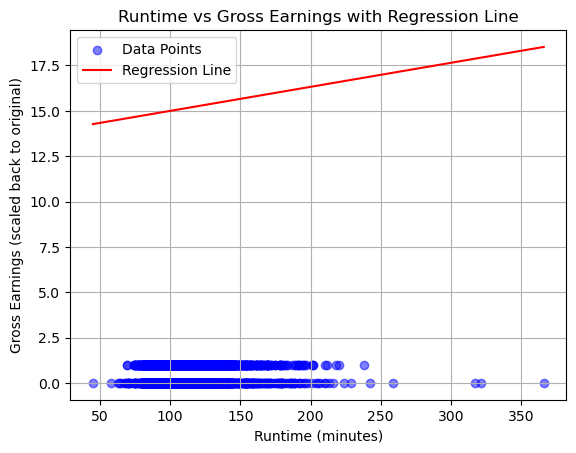

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of runtime vs gross_earn (original scale)
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line (predicted values)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create a range of runtime values
X_range_scaled = scaler_X.transform(X_range)  # Scale runtime values
y_line_scaled = model.predict(X_range_scaled)  # Predict using the model
y_line = scaler_y.inverse_transform(y_line_scaled)  # Inverse transform to original scale

plt.plot(X_range, y_line, color='red', label='Regression Line')

# Add labels and title
plt.title('Runtime vs Gross Earnings with Regression Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Earnings (scaled back to original)')
plt.legend()
plt.grid(True)
plt.show()

/Users/talmageanderson/anaconda3/envs/dnn/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


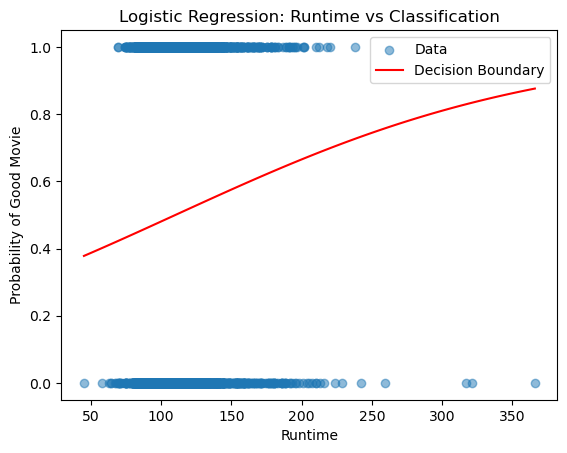

In [16]:
movies['good_bad'] = (movies['gross_earn'] >= movies['gross_earn'].median()).astype(int)

from sklearn.linear_model import LogisticRegression

X = movies[['runtime']]
y = movies['good_bad']

# Scaling runtime
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

import numpy as np
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_values_scaled = scaler.transform(x_values)
y_values = model.predict_proba(x_values_scaled)[:, 1]  # Probability for "Good"

plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.title('Logistic Regression: Runtime vs Classification')
plt.xlabel('Runtime')
plt.ylabel('Probability of Good Movie')
plt.legend()
plt.show()
